<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB
Mean Absolute Error: 10.16133572796159 
 Mean Squared Error: 267.36905386412184 
 R-squared: 0.9924468216182019
Mean Absolute Error: 12.950739860534668 
 Mean Squared Error: 451.6124267578125 
 R-squared: 0.9872419238090515


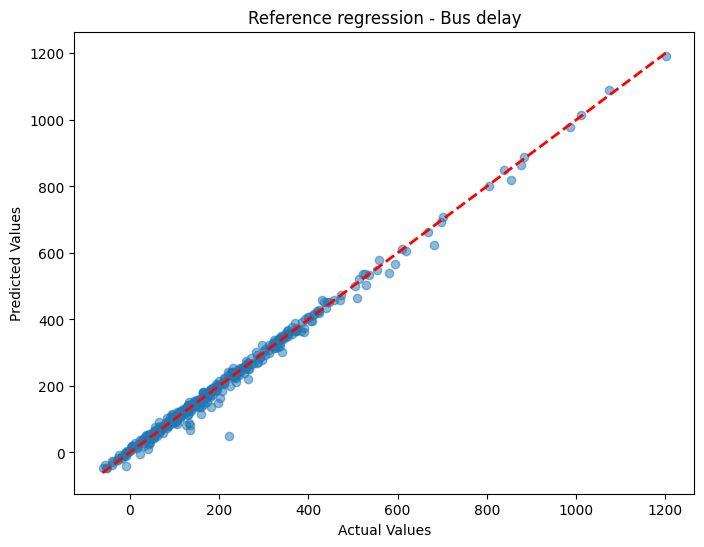

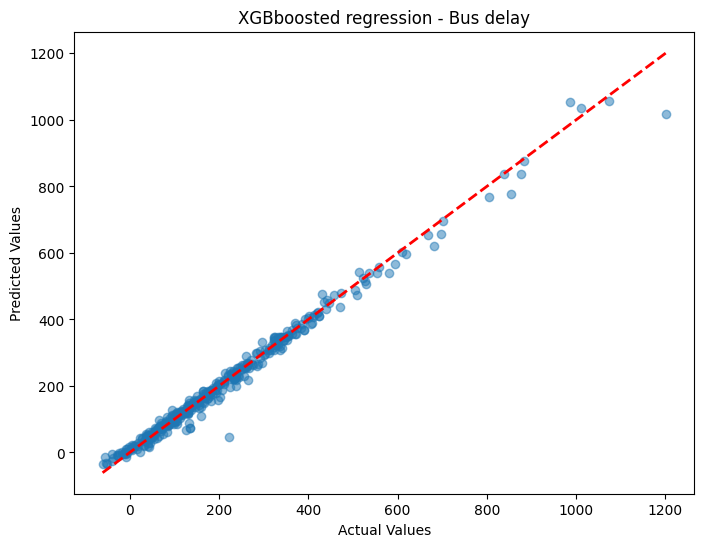

Mean Absolute Error: 82.90575279684299 
 Mean Squared Error: 17565.82748886155 
 R-squared: 0.4638906504883159
Mean Absolute Error: 26.321327913712853 
 Mean Squared Error: 1657.248812485138 
 R-squared: 0.9494207384534664


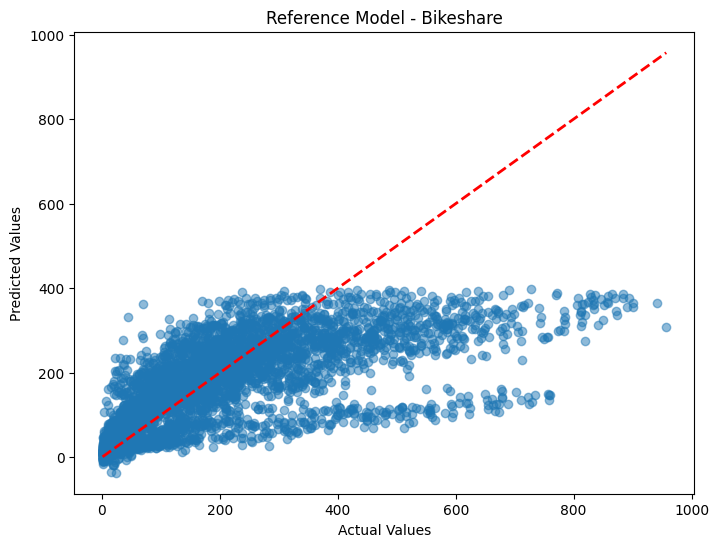

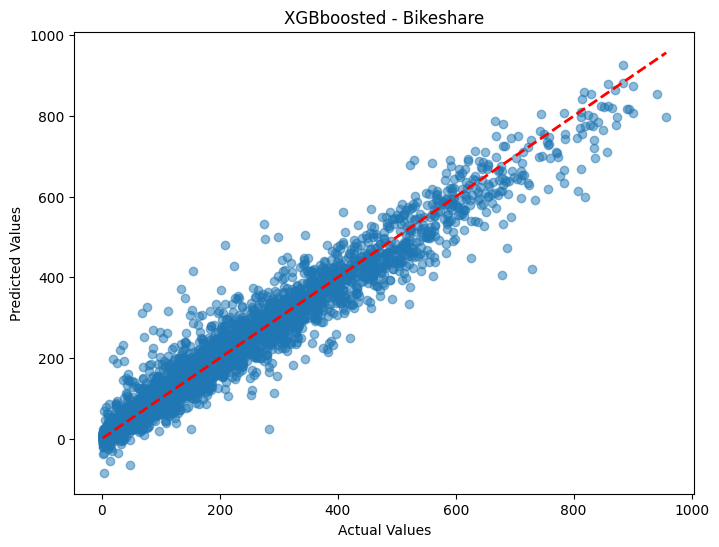

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def modelAssesment(y_test, y_pred):
  MaE = mean_absolute_error(y_test, y_pred)
  MsE = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f"Mean Absolute Error: {MaE} \n Mean Squared Error: {MsE} \n R-squared: {r2}")

def plotModel(y_test, y_pred, title):
  # Creates a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title(title)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
  plt.show()

#Bus stop data
bus_url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
bus_df = pd.read_csv(bus_url)
#Bikeshare data
bike_url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv'
bike_df = pd.read_csv(bike_url)
bus_df.info()


bus_df = bus_df.iloc[:1500]
bus_df = bus_df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

x = bus_df.drop(['Arrival_delay'], axis=1)
y = bus_df['Arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=21)
# # y_test contains the actual target values for the test dataset
# # y_pred contains the predicted values for the test dataset

# #Reference regression:
ref_model = LinearRegression()
ref_model.fit(X_train, y_train)
ref_y_pred = ref_model.predict(X_test)
modelAssesment(y_test, ref_y_pred)

# #XGBboost
XGBModel = XGBRegressor(n_estimators=50, learning_rate = 0.1, max_depth=5, random_state=21)
XGBModel.fit(X_train, y_train)
XGB_y_pred = XGBModel.predict(X_test)
modelAssesment(y_test, XGB_y_pred)

plotModel(y_test, ref_y_pred,"Reference regression - Bus delay")
plotModel(y_test, XGB_y_pred,"XGBboosted regression - Bus delay")

#Bike Share model:
target = 'cnt'
features = ['temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr']
X_bike = bike_df[features].copy()
y_bike = bike_df[target].astype(float)

X_bike_train, X_bike_test, y_bike_train, y_bike_test = train_test_split(X_bike, y_bike, test_size=0.25, random_state=21)

#Normalization
scaler = StandardScaler()
X_bike_train_scaled = scaler.fit_transform(X_bike_train)
X_bike_test_scaled = scaler.transform(X_bike_test)

'''Grid Search - takes about 3 min to run -- Best fit are kernel= 'rbf', C=10, epsilon=10
'''
# Define a parameter grid for hyperparameter tuning
# param_grid = {
#     'kernel': ['linear',  'rbf'],
#     'C': [ 1, 10],
#     'epsilon': [ 1, 10]
# }

# Create the GridSearchCV object
# bike_grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

# Fit the grid search to the scaled training data
# bike_grid_search.fit(X_bike_train_scaled, y_bike_train)

# Get the best parameters
#bike_best_params = bike_grid_search.best_params_
# print("Best Parameters:", bike_best_params)
# print("Best Score:", bike_grid_search.best_score_)
#
'''Reference model - Bike'''
ref_best_svr = SVR(kernel='rbf', C=10, epsilon=10)
ref_best_svr.fit(X_bike_train, y_bike_train)

ref_bike_y_pred = ref_best_svr.predict(X_bike_test)
modelAssesment(y_bike_test,ref_bike_y_pred)

'''XGBboost - Bike'''
XGBModel_bike = XGBRegressor(n_estimators=500, learning_rate = 0.15, max_depth=6, random_state=21)
XGBModel_bike.fit(X_bike_train, y_bike_train)
XGB_y_bike_pred = XGBModel_bike.predict(X_bike_test)
modelAssesment(y_bike_test, XGB_y_bike_pred)

plotModel(y_bike_test, ref_bike_y_pred, "Reference Model - Bikeshare")
plotModel(y_bike_test, XGB_y_bike_pred, "XGBboosted - Bikeshare")


